In [177]:
import pandas as pd
feature_csv=pd.read_csv('./primitive_features_1245.csv').drop(columns=['Function_Return_type','Function_Params'])
feature_csv.head()

,filename,Function_Name,Typedefs,Pointers,References,Arrays,Function_Calls
0,29618584_63999953.xml,['main'],b'typedef long long ll;typedef long double ld;...,[],[],"[' int a N', ' b N']","[' ios_base :: sync_with_stdio 0', ' cin . tie..."
1,29579543_64002824.xml,"['mul_mod', 'add_mod', 'solve', 'main']",b'typedef long long ll;',[],"[' ll & a', ' ll & a']","[' ll memo 100100', ' bool done 100100']","[' ll 1e9 + 7', ' add_mod memo i solve i + 1',..."
2,29605117_64004827.xml,['main'],b'typedef unsigned long long int ull;typedef l...,[],[],[' ll f N'],"[' ios_base :: sync_with_stdio false', ' s . l..."
3,29571979_64025086.xml,"['build', 'cmp', 'dis', 'main']",b'typedef long long ll;',[],[],"[' int x M', ' y M', ' t M', ' q N', ' ti N <<...","[' build p << 1 l mid', ' build p << 1 | 1 mid..."
4,29609021_64003066.xml,"['gcd', 'solve', 'main']",b'',[],[],[],"[' gcd b a % b', ' s . size ()', ' ios_base ::..."


In [178]:
def convert_string_to_list(series):
    x=series[1:-1].split(',')
    if(len(x[0])==0):
        return []
    else:
        return x

In [179]:
feature_csv['FunctionName']=feature_csv['Function_Name'].map(convert_string_to_list)
feature_csv['FunctionCount']=feature_csv['FunctionName'].map(lambda x: len(x))
feature_csv['FunctionCalls']=feature_csv['Function_Calls'].map(convert_string_to_list)
feature_csv['FunctionCallCount']=feature_csv['FunctionCalls'].map(lambda x: len(x))
feature_csv['References']=feature_csv['References'].map(convert_string_to_list)
feature_csv['ReferencesCount']=feature_csv['References'].map(lambda x: len(x))
feature_csv['Pointers']=feature_csv['Pointers'].map(convert_string_to_list)
feature_csv['PointerCount']=feature_csv['Pointers'].map(lambda x: len(x))
feature_csv['Arrays']=feature_csv['Arrays'].map(convert_string_to_list)
feature_csv['ArraysCount']=feature_csv['Arrays'].map(lambda x: len(x))
feature_csv['Typedefs']=feature_csv['Typedefs'].map(lambda x: x[2:-1].split(';'))
feature_csv['TypedefCount']=feature_csv['Typedefs'].map(lambda x: len(x)-1)
feature_csv.drop(columns=['Function_Name','Function_Calls'],inplace=True)
feature_csv.head()

,filename,Typedefs,Pointers,References,Arrays,FunctionName,FunctionCount,FunctionCalls,FunctionCallCount,ReferencesCount,PointerCount,ArraysCount,TypedefCount
0,29618584_63999953.xml,"[typedef long long ll, typedef long double ld,...",[],[],"[' int a N', ' b N']",['main'],1,"[' ios_base :: sync_with_stdio 0', ' cin . ti...",5,0,0,2,22
1,29579543_64002824.xml,"[typedef long long ll, ]",[],"[' ll & a', ' ll & a']","[' ll memo 100100', ' bool done 100100']","['mul_mod', 'add_mod', 'solve', 'main']",4,"[' ll 1e9 + 7', ' add_mod memo i solve i + 1'...",8,2,0,2,1
2,29605117_64004827.xml,"[typedef unsigned long long int ull, typedef l...",[],[],[' ll f N'],['main'],1,"[' ios_base :: sync_with_stdio false', ' s . ...",4,0,0,1,6
3,29571979_64025086.xml,"[typedef long long ll, ]",[],[],"[' int x M', ' y M', ' t M', ' q N', ' ti ...","['build', 'cmp', 'dis', 'main']",4,"[' build p << 1 l mid', ' build p << 1 | 1 mi...",6,0,0,6,1
4,29609021_64003066.xml,[],[],[],[],"['gcd', 'solve', 'main']",3,"[' gcd b a % b', ' s . size ()', ' ios_base ...",6,0,0,0,0


In [180]:
model_features=feature_csv[['filename', 'FunctionCallCount','ReferencesCount','PointerCount','ArraysCount','TypedefCount','FunctionCount']]

In [181]:
model_features.head()

,filename,FunctionCallCount,ReferencesCount,PointerCount,ArraysCount,TypedefCount,FunctionCount
0,29618584_63999953.xml,5,0,0,2,22,1
1,29579543_64002824.xml,8,2,0,2,1,4
2,29605117_64004827.xml,4,0,0,1,6,1
3,29571979_64025086.xml,6,0,0,6,1,4
4,29609021_64003066.xml,6,0,0,0,0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119ba6c88>]],
      dtype=object)

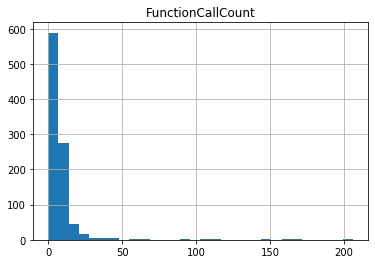

In [117]:
model_features.hist(bins=30,column='FunctionCallCount')

In [104]:
model_features.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
filename             100 non-null object
FunctionCallCount    100 non-null int64
ReferencesCount      100 non-null int64
PointerCount         100 non-null int64
ArraysCount          100 non-null int64
TypedefCount         100 non-null int64
FunctionCount        100 non-null int64
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [316]:
model_features.describe()

,FunctionCallCount,ReferencesCount,PointerCount,ArraysCount,TypedefCount,FunctionCount
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.00000
mean,8.095588,1.162815,0.126050,1.472689,1.993697,2.87605
std,14.967413,5.405314,0.700664,1.312117,5.057395,5.01411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,0.000000,0.000000,1.000000,0.000000,1.00000
50%,5.000000,0.000000,0.000000,1.000000,0.000000,1.00000
75%,9.000000,0.000000,0.000000,2.000000,2.000000,3.00000
max,206.000000,106.000000,8.000000,19.000000,70.000000,69.00000


In [118]:
model_features.to_csv('Contest124_primitive_model_features.csv',index=False)

In [191]:
summary=pd.read_csv('./Data/Contest1245/standings_statistics.csv',sep='\t')
summary=summary[summary['ProblemC_language'].str.contains('C+')]
summary.head()

,ParticipantID,Rank,Country,ProblemA_id,ProblemA_memory,ProblemA_time,ProblemA_language,ProblemB_id,ProblemB_memory,ProblemB_time,ProblemB_language,ProblemC_id,ProblemC_memory,ProblemC_time,ProblemC_language
0,29614498,1,Japan,63995951,8,30,GNU C++17,63997617,8,46,GNU C++17,63999164,504,46,GNU C++17
1,29612723,2,-,63995957,4,31,GNU C++17,63998088,8,15,GNU C++17,64000498,1064,30,GNU C++17
2,29613216,3,-,63997656,4,31,GNU C++11,64001465,8,31,GNU C++11,64005851,500,31,GNU C++11
3,29565091,4,-,63996018,4,31,GNU C++11,63998805,1960,15,GNU C++11,64003393,9792,31,GNU C++11
4,29617008,5,China,63998793,4,30,GNU C++11,64003870,4,15,GNU C++11,64010042,500,46,GNU C++11


In [399]:
summary['ProblemC_memory']=summary['ProblemC_memory'].apply(lambda x: int(x))
summary['ProblemC_time']=summary['ProblemC_time'].apply(lambda x: int(x))
summary['MemoryLabel']=pd.cut(summary['ProblemC_memory'],bins=[0,1000,200005],labels=[0,1])
summary['TimeLabel']=pd.cut(summary['ProblemC_time'],bins=[0,31,1000],labels=[0,1])

In [424]:
ground_truth=summary[['ParticipantID','ProblemC_id','MemoryLabel','ProblemC_memory','TimeLabel','ProblemC_time']]
ground_truth.head()

,ParticipantID,ProblemC_id,MemoryLabel,ProblemC_memory,TimeLabel,ProblemC_time
0,29614498,63999164,0,504,1,46
1,29612723,64000498,1,1064,0,30
2,29613216,64005851,0,500,0,31
3,29565091,64003393,2,9792,0,31
4,29617008,64010042,0,500,1,46


In [401]:
model_features['ParticipantID']=model_features['filename'].apply(lambda x: x.split('_')[0])
model_features['ProblemC_id']=model_features['filename'].apply(lambda x: x.split('_')[1][:-4])

/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Shikhar/Desktop/Studies/DataAnalytics/Assignment1/python_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [402]:
model_features.describe()

,FunctionCallCount,ReferencesCount,PointerCount,ArraysCount,TypedefCount,FunctionCount
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.00000
mean,8.095588,1.162815,0.126050,1.472689,1.993697,2.87605
std,14.967413,5.405314,0.700664,1.312117,5.057395,5.01411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,0.000000,0.000000,1.000000,0.000000,1.00000
50%,5.000000,0.000000,0.000000,1.000000,0.000000,1.00000
75%,9.000000,0.000000,0.000000,2.000000,2.000000,3.00000
max,206.000000,106.000000,8.000000,19.000000,70.000000,69.00000


In [425]:
train=model_features.join(ground_truth,lsuffix='_f', rsuffix='_g')
train=train[['FunctionCallCount','ReferencesCount','PointerCount','ArraysCount','TypedefCount','FunctionCount','MemoryLabel','ProblemC_memory','TimeLabel',"ProblemC_time"]]
train.head()

,FunctionCallCount,ReferencesCount,PointerCount,ArraysCount,TypedefCount,FunctionCount,MemoryLabel,ProblemC_memory,TimeLabel,ProblemC_time
0,5,0,0,2,22,1,0,504.0,1,46.0
1,8,2,0,2,1,4,1,1064.0,0,30.0
2,4,0,0,1,6,1,0,500.0,0,31.0
3,6,0,0,6,1,4,2,9792.0,0,31.0
4,6,0,0,0,0,3,0,500.0,1,46.0


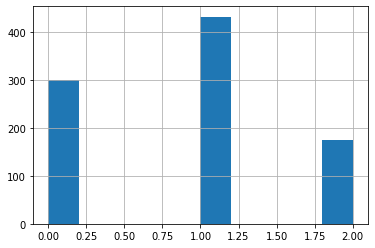

In [405]:
train['MemoryLabel'].hist()

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import numpy as np
sk_train=train.dropna()
del sk_train['ProblemC_memory']
# del sk_train['ReferencesCount']
# del sk_train['PointerCount']
y = sk_train['MemoryLabel']
del sk_train['MemoryLabel']

X = sk_train
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1,stratify=y)
model_accuracies=np.zeros(shape=(500,10,2))
for trees in range(1,50):
    for dep in range(1,5):
        #train the RF classifier
        clf = RandomForestClassifier(n_estimators = trees, max_depth = dep)
        clf.fit(X_train,y_train)

        #     RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        #                 max_depth=6, max_features='auto', max_leaf_nodes=None,
        #                 min_impurity_split=1e-07, min_samples_leaf=1,
        #                 min_samples_split=2, min_weight_fraction_leaf=0.0,
        #                 n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
        #                 verbose=0, warm_start=False)

        prediction = clf.predict(X_test)
        training_acc= accuracy_score(np.array(y_train),clf.predict(X_train))
        acc =  accuracy_score(np.array(y_test),prediction)
        model_accuracies[trees,dep,0]=training_acc
        model_accuracies[trees,dep,1]=acc
        #print ('The accuracy of Random Forest is {}'.format(acc))
        #print ('The training accuracy of Random Forest is {}'.format(training_acc))

test_accuracy=model_accuracies[:,:,1]
np.amax(test_accuracy)

0.4835164835164835

In [451]:
#clustering
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np

sk_train=train.dropna()
del sk_train['MemoryLabel']
del sk_train['ProblemC_memory']
del sk_train['TimeLabel']
#remove outliers
from scipy import stats
print(sk_train.shape)
outlier_mask=(np.abs(stats.zscore(sk_train)) < 3).all(axis=1)
sk_train=sk_train[(np.abs(stats.zscore(sk_train)) < 3).all(axis=1)]
print(sk_train.shape)

X=sk_train.values
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

(910, 7)
(839, 7)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1264367f0>]],
      dtype=object)

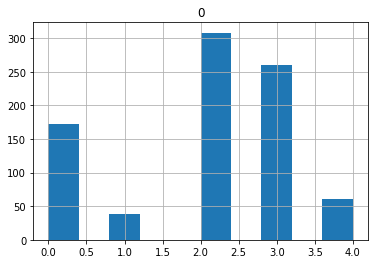

In [452]:
df=pd.DataFrame(kmeans.labels_)
df.hist()

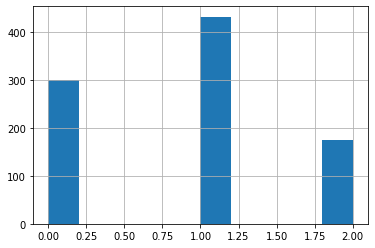

In [453]:
train['MemoryLabel'].hist()

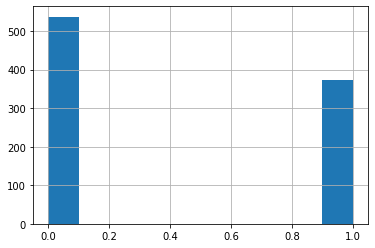

In [454]:
train['TimeLabel'].hist()

In [455]:
cluster_data=train.dropna()
cluster_data=cluster_data[outlier_mask]
cluster_data['ClusterLabel']=kmeans.labels_
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 1 to 951
Data columns (total 11 columns):
FunctionCallCount    839 non-null int64
ReferencesCount      839 non-null int64
PointerCount         839 non-null int64
ArraysCount          839 non-null int64
TypedefCount         839 non-null int64
FunctionCount        839 non-null int64
MemoryLabel          839 non-null category
ProblemC_memory      839 non-null float64
TimeLabel            839 non-null category
ProblemC_time        839 non-null float64
ClusterLabel         839 non-null int32
dtypes: category(2), float64(2), int32(1), int64(6)
memory usage: 64.1 KB


In [456]:
cluster_data[['ProblemC_memory', 'ProblemC_time', 'ClusterLabel','TimeLabel']].groupby(['ClusterLabel']).agg([np.sum, np.mean, np.std])

ProblemC_memory                           ProblemC_time  \
                         sum         mean          std           sum   
ClusterLabel                                                           
0                   543248.0  3158.418605  6075.886844        8306.0   
1                    79824.0  2100.631579  2329.849646        1555.0   
2                   706524.0  2293.909091  4226.407287       11442.0   
3                   597752.0  2299.046154  4045.999347        8005.0   
4                   110184.0  1806.295082  2950.361827        2290.0   

                                    
                   mean        std  
ClusterLabel                        
0             48.290698   6.531733  
1             40.921053  11.352775  
2             37.149351   7.851457  
3             30.788462   1.421519  
4             37.540984   7.606080

In [444]:
cluster_data.describe()

,FunctionCallCount,ReferencesCount,PointerCount,ArraysCount,TypedefCount,FunctionCount,ProblemC_memory,ProblemC_time,ClusterLabel
count,556.000000,556.000000,556.0,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,5.280576,0.192446,0.0,1.433453,0.821942,1.767986,2330.489209,36.674460,1.142086
std,3.309345,0.633037,0.0,0.495998,1.430285,1.254233,4279.768860,7.330312,0.739826
min,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,108.000000,30.000000,0.000000
25%,3.000000,0.000000,0.0,1.000000,0.000000,1.000000,888.000000,31.000000,1.000000
50%,4.000000,0.000000,0.0,1.000000,0.000000,1.000000,1056.000000,31.000000,1.000000
75%,7.000000,0.000000,0.0,2.000000,1.000000,2.000000,1828.000000,46.000000,2.000000
max,20.000000,6.000000,0.0,2.000000,7.000000,8.000000,44036.000000,46.000000,2.000000
